#### Pakkar

In [499]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction import stop_words
import string
from keras.preprocessing import text, sequence
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.models import Sequential, Model
from tensorflow.python.keras.layers import Dense, Activation, Dropout, Flatten, Input, Embedding
from tensorflow.python.keras.optimizers import Adadelta
from tensorflow.python.keras.layers import Conv1D, MaxPooling1D, GRU, LSTM
import tensorflow as tf

In [2]:
tf.compat.v1.disable_eager_execution()

In [3]:
from matplotlib.colors import Normalize
import matplotlib.pyplot as plt

#### Innlestur gagna

In [4]:
train_data = pd.read_csv('data/train.csv',delimiter=',')

test_data = pd.read_csv('data/test.csv',delimiter=',')


### Gagnasettið
Hér má sjá gagnasettið sem við þjálfum módelið á. Við erum með comment_text og hann er búið að greina (0 eða 1) hvort hann sé toxic, severe_toxic, obscene, threat, insult eða identity_hate.

In [7]:
display(train_data.head())
cols = train_data.columns
print('Dálkarnir eru: ')
for col in cols:
    print('- \t',col)


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


Dálkarnir eru: 
- 	 id
- 	 comment_text
- 	 toxic
- 	 severe_toxic
- 	 obscene
- 	 threat
- 	 insult
- 	 identity_hate


In [8]:
display(test_data.head())

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


### Text preprocessing


In [286]:

def textpreprocess(sentence):
    sentence = sentence.lower()
    
    #Taka út ensk stopporð
    stopwords = stop_words.ENGLISH_STOP_WORDS
    for sw in stopwords:
        if len(sw) > 1 and sw in sentence:
            sentence.replace(sw,'')
    
    #Taka út tölur
    sentence = ''.join([i for i in sentence if not i.isdigit()])
    
    #Taka út punkta, kommur og þannig lagað
    sentence=sentence.translate(str.maketrans('', '', string.punctuation))
    
    return sentence

In [10]:
drasl = train_data.to_numpy()

In [6]:
from matplotlib.colors import Normalize

Hér er þá búið að preprocessa textann

In [7]:
def getProcessedText(dataset):
    for i in range(len(x_train)):
        x_train[i] = textpreprocess(x_train[i])
    return x_train

In [287]:
x_train = train_data['comment_text'].to_numpy()
for i in range(len(x_train)):
    x_train[i] = textpreprocess(x_train[i])

In [9]:
temp= x_train

In [10]:
max_comment_length = len(train_data['comment_text'][0])

for comment in train_data['comment_text']:
    if len(comment) > max_comment_length:
        max_comment_length = len(comment)

In [11]:
def getSubet(dataset, size):
    return dataset[0:size]

Prófa að exclude-a bara toxic dálkinn og gera model á honum

In [15]:
# toxicCol = train_data['toxic']
classes = ["toxic","severe_toxic","obscene","threat","insult","identity_hate"]

In [18]:
# X_train = train_data['comment_text'].to_numpy()
X_train = temp
# y_train = (train_data.values[:,2:])
y_train = train_data[classes]
print(len(y_train), len(X_train))
# Set aside validation data for monitoring training progress

assert len(X_train) == len(y_train)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2)

print('=================')
print('|','train_data shape:', X_train.shape)
print('|',X_train.shape[0], 'train samples')
print('|',y_test.shape[0], 'test samples')
print('=================')

159571 159571
| train_data shape: (127656,)
| 127656 train samples
| 31915 test samples


In [391]:
from sklearn.feature_extraction.text import CountVectorizer

Count = CountVectorizer()
fitX = Count.fit_transform(x_train)
Voc = Count.get_feature_names()

### Hér er gagnasettinu skipt jafn á milli toxic og non toxic commenta
    #### skoða þetta from sklearn.metrics import classification_report
    
Bý hérna til þjálfunargögn með upprunalegum commentum þ.e. ekki upsampled

In [457]:
def randomOversample(classes,train_data):
    for className in classes:
        count_class_0, count_class_1=train_data[className].value_counts()
        df_class_1 = train_data[train_data[className] == 1]
        df_class_0 = train_data[train_data[className] == 0]
        df_class_1_over = df_class_1.sample(count_class_0, replace=True)
        df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)
        print(df_test_over[className].value_counts())
    return df_test_over

### ======

In [12]:
comments = train_data['comment_text']
original_testData = train_data

In [16]:
original_testData=original_testData.sample(frac=1)

original_X_testData=original_testData['comment_text']
original_Y_testData=original_testData[classes]

In [17]:
original_X_testData = getProcessedText(original_X_testData)
original_Y_testData=original_Y_testData.to_numpy()

In [18]:
df_majority = train_data[train_data.toxic==0]
df_minority = train_data[train_data.toxic==1]

In [19]:
df_majority=df_majority.sample(frac=1)
df_upsampled = pd.concat([pd.DataFrame(df_majority.values[0:len(df_minority)],columns=train_data.columns)
, df_minority])

In [163]:
df_upsampled=df_upsampled.sample(frac=1)
display(df_upsampled.head())

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
31615,53f6348bd9e5ef6e,piss off homo \n\nstop i say stop it,1,0,0,0,0,0
640,85a711bf9905af42,nicholas i think you are assuming abortion imp...,0,0,0,0,0,0
104395,2e8d843809f2603b,without consensus who the fuck do you think yo...,1,0,1,0,1,0
148725,512eaff7387d2f23,republic of mosquito \n\nfaggot faggot get off...,1,0,1,0,1,1
4112,dfa110aa2e4b33d5,can anyone find a blue paul terrier picture we...,0,0,0,0,0,0


In [20]:
upsampled_y_train = df_upsampled[classes]
upsampled_x_train = df_upsampled['comment_text']

In [165]:
upsampled_x_train = getProcessedText(upsampled_x_train)

### ====

In [21]:
assert len(upsampled_x_train) == len(upsampled_y_train)
X_train, X_test, y_train, y_test = train_test_split(upsampled_x_train, upsampled_y_train, test_size=0.2)

print('Hérna er þetta', len(X_test))
print('Hérna er þetta', len(y_test))

X_test=original_X_testData[0:len(X_test)]
y_test=original_Y_testData[0:len(y_test)]

print('=================')
print('|','train_data shape:', X_train.shape)
print('|',X_train.shape[0], 'train samples')
print('|',y_test.shape[0], 'test samples')
print('=================')

Hérna er þetta 6118
Hérna er þetta 6118
| train_data shape: (24470,)
| 24470 train samples
| 6118 test samples


In [22]:
max_words = 20000 # <- spurning um hvað þetta eigi að vera
output_vector_len = int(df_upsampled.fillna('').astype(str).apply(lambda x:x.str.len()).mean()[1])
tokenizer = text.Tokenizer(num_words=max_comment_length)
num_classes = 6

tokenizer.fit_on_texts(list(X_train))
tokTrain = tokenizer.texts_to_sequences(X_train)
tokTest = tokenizer.texts_to_sequences(X_test)

x_train=sequence.pad_sequences(tokTrain, maxlen=max_comment_length)
x_test=sequence.pad_sequences(tokTest, maxlen=max_comment_length)


#### Góð útskýring á multilabel classifier
https://medium.com/@vijayabhaskar96/multi-label-image-classification-tutorial-with-keras-imagedatagenerator-cd541f8eaf24

### 92% acc. model

In [500]:
inp = Input(shape=(max_comment_length,))
model = Sequential()
model = Embedding(max_words, output_vector_len)(inp) 
#Embedded útskýring:
    #Turns positive integers (indexes) into dense vectors of fixed size.
######

#####
model = Dropout(0.5)(model)
model = Conv1D(filters=32, kernel_size=2, padding='same', activation='relu')(model)
model = MaxPooling1D(pool_size=2)(model)
model = Dropout(0.5)(model)
model = Conv1D(filters=32, kernel_size=2, padding='same', activation='relu')(model)
model = MaxPooling1D(pool_size=2)(model)
model = Dropout(0.5)(model)
model = GRU(128)(model)

model = Dense(64, activation="relu")(model)
model = Dense(32, activation="relu")(model)
model = Dense(16, activation="relu")(model)
model = Dense(6, activation="sigmoid")(model)
model = Model(inputs=inp, outputs=model)
model.compile(loss='binary_crossentropy', optimizer=Adadelta(), metrics=[tf.keras.metrics.AUC()])
# model.compile(loss='sparse_categorical_crossentropy', optimizer=Adadelta(), metrics=['accuracy'])
model.summary()

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 5000)]            0         
_________________________________________________________________
embedding_11 (Embedding)     (None, 5000, 328)         6560000   
_________________________________________________________________
dropout (Dropout)            (None, 5000, 328)         0         
_________________________________________________________________
conv1d (Conv1D)              (None, 5000, 32)          21024     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 2500, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2500, 32)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 2500, 32)          208

In [169]:
#Sjá hvernig y- þjálfunargögnin líta út
print(y_train[0:4])

       toxic severe_toxic obscene threat insult identity_hate
102544     1            0       0      0      0             0
1104       0            0       0      0      0             0
82566      1            1       1      0      1             1
31         0            0       0      0      0             0


In [172]:
batch_size = 32
epochs = 1
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose = 1,
                    validation_split=0.1)
score = model.evaluate(x_test, y_test, batch_size=batch_size, verbose=1)

print('Test acc: {}'.format(score[1]))

Train on 22023 samples, validate on 2447 samples
6118/6118 [==============================] - 82s 13ms/sample - loss: 0.1971 - auc: 0.9164
Test acc: 0.9164426922798157


In [181]:
print(x_test.shape)

(6118, 5000)


In [182]:
predictions = model.predict(x_test,batch_size=32, verbose=0)

In [77]:
print(predictions)

[[0.47008893 0.02315657 0.12893164 0.01507867 0.1503449  0.05878903]
 [0.59849006 0.06102102 0.24003151 0.04465153 0.26126352 0.10866596]
 [0.9412674  0.14670779 0.6007785  0.08213215 0.532858   0.15021421]
 ...
 [0.9835127  0.06364855 0.6647508  0.02560893 0.5215145  0.0654731 ]
 [0.9509771  0.02470218 0.3841281  0.00876251 0.33090505 0.03751686]
 [0.87502795 0.04224735 0.3462971  0.02132561 0.32201153 0.06567137]]


In [183]:
assert predictions.shape == y_test.shape
print(predictions.shape)
print(y_test.shape)

(6118, 6)
(6118, 6)


In [184]:

for line in range(predictions.shape[0]):
    for item in range(predictions.shape[1]):
        if predictions[line,item] > 0.5:
            predictions[line,item] = 1
        else:
            predictions[line,item] = 0
        

--------------------------------------------------
TN: 33268	 FP: 2120 
FN: 451	 TP: 869
The sensitivity/recall is: 65.83%
The specificity is: 94.01%
The precision is: 29.07%
--------------------------------------------------


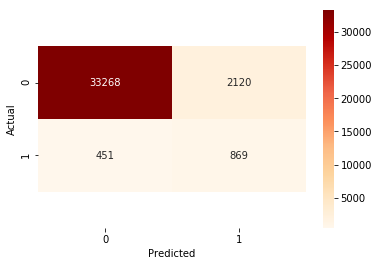

In [185]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

totals_mat = confusion_matrix(y_test.astype(int).ravel(), predictions.astype(int).ravel())
plot_conf_mat(totals_mat)

In [117]:
print(arr.shape)
fjoldi = (arr.shape[0]*arr.shape[1])
print(rett/fjoldi)
print(vitlaust/fjoldi)

(6118, 6)
0.9205350332352621
0.07946496676473794


In [173]:
def plot_acc_params(param, train_acc_, val_acc_, param_name, title):
    plt.plot(param, train_acc_,label='Training accuracy')
    plt.plot(param, val_acc_,label='Validation accuracy')
    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

def find_best_SVM_params(Cs, gammas, kernel_, xtrain, ytrain, xval, yval):
    training_acc = np.zeros(len(Cs))
    val_acc = np.zeros(len(Cs))
    # ignores the gamma values if linear
    if kernel_ != 'linear':
        training_acc = np.zeros((len(Cs), len(gammas)))
        val_acc = np.zeros((len(Cs), len(gammas)))
    
    for i in range(len(Cs)):
        print("c: ", Cs[i])
        if kernel_ != 'linear':
            for j in range(len(gammas)):
                print("gamma: ", gammas[j], end =" ")
                clf = OneVsRestClassifier(SVC(gamma=gammas[j], C = Cs[i], kernel = kernel_))
                clf.fit(xtrain, ytrain)
                val_acc[i, j] = get_row_accuracy(yval, clf.predict(xval))
                training_acc[i, j] = get_row_accuracy(ytrain, clf.predict(xtrain))
            print()
        else:
            clf = OneVsRestClassifier(SVC(C = Cs[i], kernel = kernel_))
            clf.fit(xtrain, ytrain)
            val_acc[i] = get_row_accuracy(yval, clf.predict(xval))
            training_acc[i] = get_row_accuracy(ytrain, clf.predict(xtrain))
#     print('Train acc \n', training_acc)
#     print('Validation acc \n', val_acc)
    return training_acc, val_acc

# Utility function to move the midpoint of a colormap to be around
# the values of interest.
class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

def plot_heatmap(data_matrix, title, xlabel, ylabel, x_values, y_values, vmin_, midpoint_):
    plt.figure(figsize=(8, 6))
    plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
    plt.imshow(data_matrix, interpolation='nearest', cmap=plt.cm.seismic,
               norm=MidpointNormalize(vmin=vmin_, midpoint=midpoint_))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.colorbar()
    
    plt.grid(None)
    plt.xticks(np.arange(len(x_values)), x_values, rotation=45)
    plt.yticks(np.arange(len(y_values)), y_values)
    plt.title(title)
    plt.show()

In [37]:
import seaborn as sn
def plot_conf_mat(mat, cmap_="OrRd" ):
    tn, fp, fn, tp  = mat.ravel()
    print('-'*50)
    print("TN: {}\t FP: {} \nFN: {}\t TP: {}".format(tn, fp, fn, tp))
    print("The sensitivity/recall is: {:.2%}".format(tp/(tp+fn)))
    print("The specificity is: {:.2%}".format(tn/(tn+fp)))
    print("The precision is: {:.2%}".format(tp/(tp+fp)))
    print('-'*50)
    ax = sn.heatmap(mat, annot=True, fmt="d", cmap=cmap_)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    # Lætur tölurnar vera í miðjum kassanum
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.show()

In [24]:
inp = Input(shape=(max_comment_length,))
stuttModel = Sequential()
stuttModel = Embedding(max_words, output_vector_len)(inp) 
#Embedded útskýring:
    #Turns positive integers (indexes) into dense vectors of fixed size.
######

#####
stuttModel = GRU(128)(stuttModel)

stuttModel = Dense(64, activation="relu")(stuttModel)
stuttModel = Dense(6, activation="sigmoid")(stuttModel)
stuttModel = Model(inputs=inp, outputs=stuttModel)
stuttModel.compile(loss='binary_crossentropy', optimizer=Adadelta(), metrics=[tf.keras.metrics.AUC()])
stuttModel.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 5000)]            0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 5000, 328)         6560000   
_________________________________________________________________
gru_1 (GRU)                  (None, 128)               175488    
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 390       
Total params: 6,744,134
Trainable params: 6,744,134
Non-trainable params: 0
_________________________________________________________________


In [30]:
size=4000
# sub_x_train, sub_y_train,sub_y_test,sub_x_test = getSubet(x_train,size),getSubet(y_train,size),getSubet(y_test,size//5),getSubet(x_test,size//5)
batch_size = 64
epochs = 1
stuttHistory = stuttModel.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose = 1,
                    validation_split=0.1)
stuttScore = stuttModel.evaluate(x_test, y_test, batch_size=batch_size, verbose=1)



Train on 22023 samples, validate on 2447 samples
6118/6118 [==============================] - 169s 28ms/sample - loss: 0.1098 - auc: 0.9380


In [35]:
print('Test acc: {}'.format(stuttScore[1]))

Test acc: 0.9379918575286865


--------------------------------------------------
TN: 34741	 FP: 629 
FN: 574	 TP: 764
The sensitivity/recall is: 57.10%
The specificity is: 98.22%
The precision is: 54.85%
--------------------------------------------------


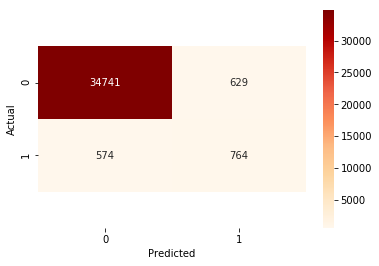

In [38]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

for line in range(sPredictions.shape[0]):
    for item in range(sPredictions.shape[1]):
        if sPredictions[line,item] > 0.5:
            sPredictions[line,item] = 1
        else:
            sPredictions[line,item] = 0


s_totals_mat = confusion_matrix(y_test.astype(int).ravel(), sPredictions.astype(int).ravel())
plot_conf_mat(s_totals_mat)

In [416]:
# print(original_X_testData[0:len(X_test)][6117])
tharsem = (np.where(sPredictions == 1)[0])
for i in tharsem:
    print(sPredictions.astype(int)[i])
# print(sPredictions[6117])

[1 0 0 0 0 0]
[1 0 0 0 0 0]
[1 0 0 0 0 0]
[1 0 0 0 0 0]
[1 0 1 0 1 0]
[1 0 1 0 1 0]
[1 0 1 0 1 0]
[1 0 0 0 0 0]
[1 0 1 0 1 0]
[1 0 1 0 1 0]
[1 0 1 0 1 0]
[1 0 1 0 1 0]
[1 0 1 0 1 0]
[1 0 1 0 1 0]
[1 0 0 0 0 0]
[1 0 0 0 0 0]
[1 0 1 0 1 0]
[1 0 1 0 1 0]
[1 0 1 0 1 0]
[1 0 0 0 0 0]
[1 0 0 0 0 0]
[1 0 1 0 1 0]
[1 0 1 0 1 0]
[1 0 1 0 1 0]
[1 0 0 0 0 0]
[1 0 0 0 0 0]
[1 0 0 0 0 0]
[1 0 0 0 0 0]
[1 0 0 0 0 0]
[1 0 0 0 0 0]
[1 0 0 0 0 0]
[1 0 0 0 0 0]
[1 0 0 0 0 0]
[1 0 0 0 0 0]
[1 0 0 0 0 0]
[1 0 0 0 0 0]
[1 0 0 0 0 0]
[1 0 0 0 0 0]
[1 0 0 0 0 0]
[1 0 0 0 0 0]
[1 0 0 0 0 0]
[1 0 0 0 0 0]
[1 0 0 0 0 0]
[1 0 1 0 1 0]
[1 0 1 0 1 0]
[1 0 1 0 1 0]
[1 0 0 0 0 0]
[1 0 0 0 0 0]
[1 0 0 0 0 0]
[1 0 0 0 0 0]
[1 0 1 0 1 0]
[1 0 1 0 1 0]
[1 0 1 0 1 0]
[1 0 0 0 0 0]
[1 0 0 0 0 0]
[1 0 0 0 0 0]
[1 0 1 0 1 0]
[1 0 1 0 1 0]
[1 0 1 0 1 0]
[1 0 0 0 0 0]
[1 0 0 0 0 0]
[1 0 0 0 0 0]
[1 0 0 0 0 0]
[1 0 1 0 1 0]
[1 0 1 0 1 0]
[1 0 1 0 1 0]
[1 0 1 0 1 0]
[1 0 1 0 1 0]
[1 0 1 0 1 0]
[1 0 1 0 1 0]
[1 0 1 0 1 0]
[1 0 1

[1 0 1 0 0 0]
[1 0 0 0 0 0]
[1 0 0 0 0 0]
[1 0 0 0 0 0]
[1 0 1 0 1 0]
[1 0 1 0 1 0]
[1 0 1 0 1 0]
[1 0 0 0 0 0]
[1 0 0 0 0 0]
[1 0 0 0 0 0]
[1 0 1 0 1 0]
[1 0 1 0 1 0]
[1 0 1 0 1 0]
[1 0 1 0 1 0]
[1 0 1 0 1 0]
[1 0 1 0 1 0]
[1 0 0 0 0 0]
[1 0 1 0 1 0]
[1 0 1 0 1 0]
[1 0 1 0 1 0]
[1 0 1 0 1 0]
[1 0 1 0 1 0]
[1 0 1 0 1 0]
[1 0 1 0 1 0]
[1 0 1 0 1 0]
[1 0 1 0 1 0]
[1 0 0 0 0 0]
[1 0 0 0 0 0]
[1 0 0 0 0 0]
[1 0 0 0 0 0]
[1 0 0 0 0 0]
[1 0 0 0 0 0]
[1 0 0 0 0 0]
[1 0 0 0 0 0]
[1 0 0 0 0 0]
[1 0 0 0 0 0]
[1 0 1 0 1 0]
[1 0 1 0 1 0]
[1 0 1 0 1 0]
[1 0 0 0 0 0]
[1 0 0 0 0 0]
[1 0 1 0 1 0]
[1 0 1 0 1 0]
[1 0 1 0 1 0]
[1 0 0 0 0 0]
[1 0 0 0 0 0]
[1 0 0 0 0 0]
[1 0 1 0 1 0]
[1 0 1 0 1 0]
[1 0 1 0 1 0]
[1 0 0 0 0 0]
[1 0 0 0 0 0]
[1 0 0 0 0 0]
[1 0 0 0 0 0]
[1 0 0 0 0 0]
[1 0 0 0 0 0]
[1 0 0 0 0 0]
[1 0 1 0 0 0]
[1 0 1 0 0 0]
[1 0 0 0 0 0]
[1 0 0 0 0 0]
[1 0 0 0 0 0]
[1 0 0 0 0 0]
[1 0 0 0 0 0]
[1 0 0 0 0 0]
[1 0 0 0 0 0]
[1 0 0 0 0 0]
[1 0 0 0 0 0]
[1 0 0 0 0 0]
[1 0 0 0 0 0]
[1 0 1 0 1 0]
[1 0 1

                  toxic  severe_toxic   obscene    threat    insult  \
toxic          1.000000      0.308619  0.676515  0.157058  0.647518   
severe_toxic   0.308619      1.000000  0.403014  0.123601  0.375807   
obscene        0.676515      0.403014  1.000000  0.141179  0.741272   
threat         0.157058      0.123601  0.141179  1.000000  0.150022   
insult         0.647518      0.375807  0.741272  0.150022  1.000000   
identity_hate  0.266009      0.201600  0.286867  0.115128  0.337736   

               identity_hate  
toxic               0.266009  
severe_toxic        0.201600  
obscene             0.286867  
threat              0.115128  
insult              0.337736  
identity_hate       1.000000  


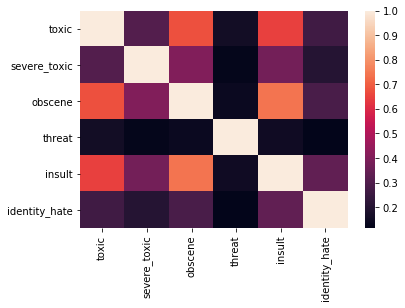

In [397]:
import seaborn as sn
sn.heatmap(train_data[classes].corr())
print(train_data[classes].corr())

In [387]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

def removeStopwords(bag_of_words):    
    wordsFiltered = []
    for w in bag_of_words:
        if w not in englishStopWords:
            wordsFiltered.append(w)
    return wordsFiltered
    

In [417]:
# classColNo: number of the column. Toxic:1, Severe_Toxic:2, etc.
# yValues: all y-values
# stemming: if True then example "swimming" => "swimg" etc.
def mostCommonWords(classColNo, yValues,stemming,x_data):
    class_y_values = yValues[:,classColNo]
    i_c = np.where(class_y_values == 1)[0]
    words_in_col = []
    for i in i_c:
        for word in str(x_data[i]).split():
            if stemming is False:
                words_in_col.append(word)
            else: words_in_col.append(stemmer.stem(word))
    word_counter = {}
    for word in words_in_col:
        if word in word_counter:
            word_counter[word] += 1
        else:
            word_counter[word] = 1 

    filtered = removeStopwords(word_counter)


    popular_words = sorted(filtered, key = word_counter.get, reverse = True)[:10]
    popular_words_count=[]
    for i in popular_words:
        popular_words_count.append(word_counter[i])
    return popular_words, popular_words_count

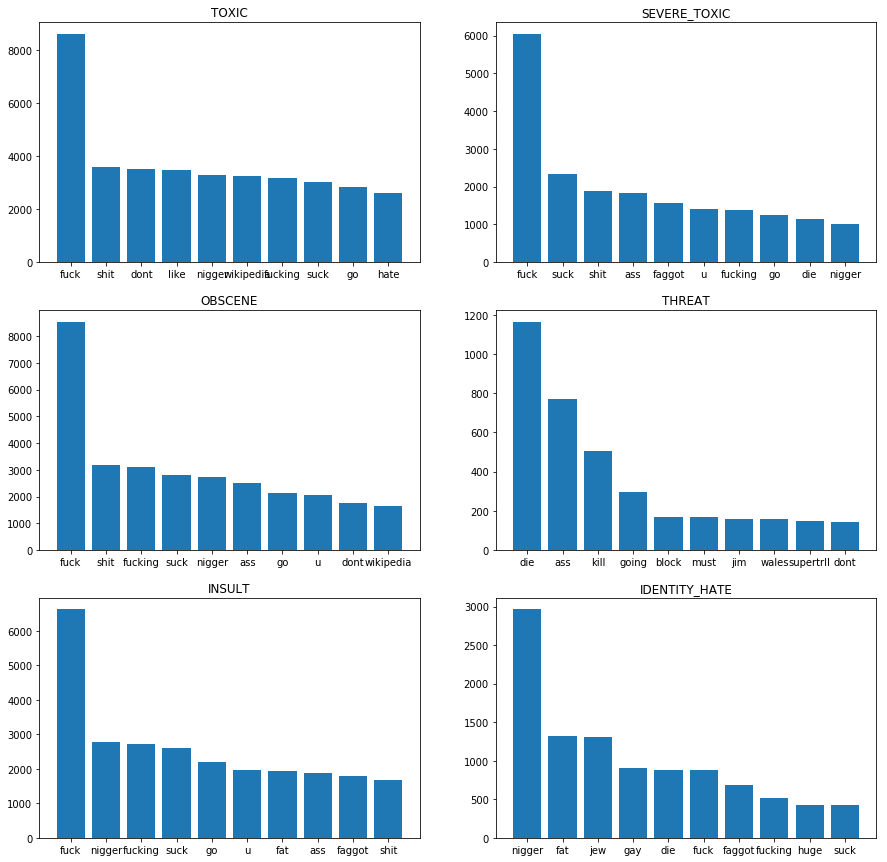

In [420]:
fig, ((ax1, ax2), (ax3, ax4),(ax5,ax6)) = plt.subplots(3,2, figsize=(15,15))
ax = [ax1,ax2,ax3,ax4,ax5,ax6]
for i in range(len(classes)):
    theWords, theCount = (mostCommonWords(i,yValues,False,x_train))
    ax[i].bar(theWords,theCount)
    ax[i].set_title(classes[i].upper())
    

## Algengustu orð modelsins

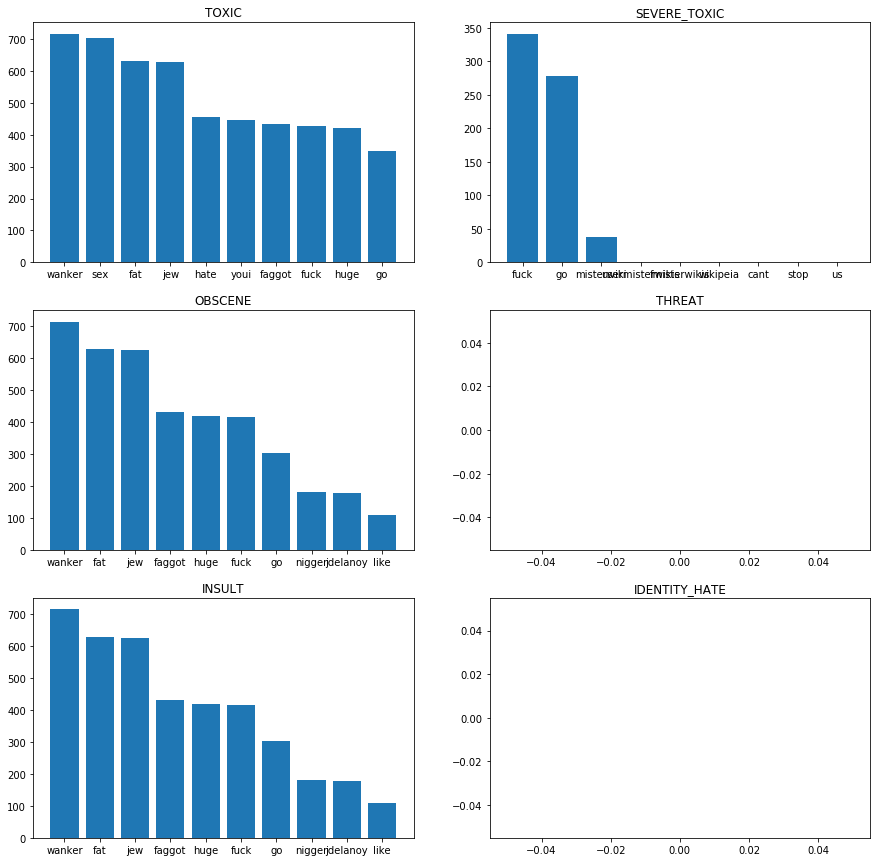

In [421]:
fig, ((ax1, ax2), (ax3, ax4),(ax5,ax6)) = plt.subplots(3,2, figsize=(15,15))
ax = [ax1,ax2,ax3,ax4,ax5,ax6]
for i in range(len(classes)):
    theWords, theCount = (mostCommonWords(i,sPredictions.astype(int),False,original_X_testData[0:len(X_test)]))
    ax[i].bar(theWords,theCount)
    ax[i].set_title(classes[i].upper())

In [423]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

def plot_precision_recall(recall, precision, average_param, average_precision, no_skill):
    plt.figure()

    plt.step(recall[average_param], precision[average_param], where='post', label='Our model')
    plt.step(no_skill[1], no_skill[0], linestyle='--', where='post', label='Random guess')

    plt.xlabel('Recall/sensitivity')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title(
        'Average precision score, {}-averaged over all classes: AP={:0.2f}'
        .format(average_param, average_precision[average_param]))
    plt.show()
    
def calc_precision_recall(y_true, y_scores, average_param = "micro", y_pred_ = None ):
    # Dæmi um notkun calc_precision_recall(y_test_np, y_scores, y_pred_ = y_test_pred)
    # y_scores is the decision function 
    # For each class
    # average_param has to be one of (None, 'micro', 'macro', 'weighted', 'samples')
    # micro = Calculate metrics globally by considering each element of the label indicator matrix as a label
    # macro = reiknar average_precision_score fyrir hvern label (hér: toxic...) og tekur óvigtað meðaltal
    # Ættum helst að nota micro held ég
    # y_scores er decision function sem segir hvoru megin (og hve langt frá) við aðskilnaðarplanið sem 
    # classfierinn býr til
    # no_skill baseline classifier giskar randomly
    # betra að nota random gisk hérna því all-zero gisk gefur 0 precision
    if y_pred_ is not None:
        # calculate F1 score
        f1 = f1_score(y_true, y_pred_, average = average_param)
        auc = roc_auc_score(y_true, y_scores, average = average_param)
        print("F1 score: {:.3f}, AUC score: {:.3f}".format(f1, auc))
        
    r_model = np.random.randint(2, size=len(y_true.ravel()))
    no_skill = precision_recall_curve(y_true.ravel(), r_model)
    
    precision = dict()
    recall = dict()
    average_precision = dict()

    # A "micro-average": quantifying score on all classes jointly
    precision[average_param], recall[average_param], _ = precision_recall_curve(y_true.ravel(),
        y_scores.ravel())

    average_precision[average_param] = average_precision_score(y_true, y_scores,
                                                         average=average_param)
    
    plot_precision_recall(recall, precision, average_param, average_precision, no_skill)
    
# calc_precision_recall(y_test_np, y_scores, y_pred_ = y_test_pred)

In [501]:
df = randomOversample(classes,train_data)
upsampled_y_train = df[classes]
upsampled_x_train = df['comment_text']

assert len(upsampled_x_train) == len(upsampled_y_train)
X_train, X_test, y_train, y_test = train_test_split(upsampled_x_train, upsampled_y_train, test_size=0.2,shuffle=True)
X_train, X_test, y_train, y_test = X_train[0:1000], X_test[0:100], y_train[0:1000], y_test[0:100]

print('Hérna er þetta', len(X_test))
print('Hérna er þetta', len(y_test))

X_test=original_X_testData[0:len(X_test)]
y_test=original_Y_testData[0:len(y_test)]

print('=================')
print('|','train_data shape:', X_train.shape)
print('|',X_train.shape[0], 'train samples')
print('|',y_test.shape[0], 'test samples')
print('=================')

max_words = 20000 # <- spurning um hvað þetta eigi að vera
output_vector_len = int(df_upsampled.fillna('').astype(str).apply(lambda x:x.str.len()).mean()[1])
tokenizer = text.Tokenizer(num_words=max_words)
num_classes = 6

tokenizer.fit_on_texts(list(X_train))
tokTrain = tokenizer.texts_to_sequences(X_train)
tokTest = tokenizer.texts_to_sequences(X_test)

x_train=sequence.pad_sequences(tokTrain, maxlen=max_comment_length)
x_test=sequence.pad_sequences(tokTest, maxlen=max_comment_length)

inp = Input(shape=(max_comment_length,))
stuttModel = Sequential()
stuttModel = Embedding(max_words, output_vector_len)(inp) 
#Embedded útskýring:
    #Turns positive integers (indexes) into dense vectors of fixed size.
######

#####
stuttModel = LSTM(128)(stuttModel)

stuttModel = Dense(64, activation="relu")(stuttModel)
stuttModel = Dense(6, activation="sigmoid")(stuttModel)
stuttModel = Model(inputs=inp, outputs=stuttModel)
stuttModel.compile(loss='binary_crossentropy', optimizer=Adadelta(), metrics=[tf.keras.metrics.AUC()])
stuttModel.summary()

1    144277
0    144277
Name: toxic, dtype: int64
1    157976
0    157976
Name: severe_toxic, dtype: int64
1    151122
0    151122
Name: obscene, dtype: int64
1    159093
0    159093
Name: threat, dtype: int64
1    151694
0    151694
Name: insult, dtype: int64
1    158166
0    158166
Name: identity_hate, dtype: int64
Hérna er þetta 100
Hérna er þetta 100
| train_data shape: (1000,)
| 1000 train samples
| 100 test samples
Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 5000)]            0         
_________________________________________________________________
embedding_12 (Embedding)     (None, 5000, 328)         6560000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               233984    
_________________________________________________________________
dense_24 (Dense)             

In [502]:
size=4000
# sub_x_train, sub_y_train,sub_y_test,sub_x_test = getSubet(x_train,size),getSubet(y_train,size),getSubet(y_test,size//5),getSubet(x_test,size//5)
batch_size = 128
epochs = 1
stuttHistory = stuttModel.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose = 1,validation_split=0.2)
stuttScore = stuttModel.evaluate(x_test, y_test, batch_size=batch_size, verbose=1)

Train on 800 samples, validate on 200 samples
100/100 [==============================] - 4s 38ms/sample - loss: 0.6730 - auc_11: 0.6846


In [495]:
pred = stuttModel.predict(x_test,batch_size=32, verbose=0)
y_scores = pred

In [496]:
for line in range(pred.shape[0]):
    for item in range(pred.shape[1]):
        if pred[line,item] > 0.5:
            pred[line,item] = 1
        else:
            pred[line,item] = 0

--------------------------------------------------
TN: 555	 FP: 12 
FN: 15	 TP: 18
The sensitivity/recall is: 54.55%
The specificity is: 97.88%
The precision is: 60.00%
--------------------------------------------------


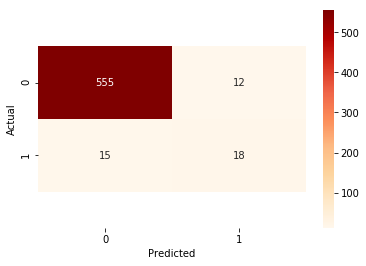

In [489]:
s_totals_mat = confusion_matrix(y_test.astype(int).ravel(), pred.astype(int).ravel())
plot_conf_mat(s_totals_mat)

F1 score: 0.181, AUC score: 0.630


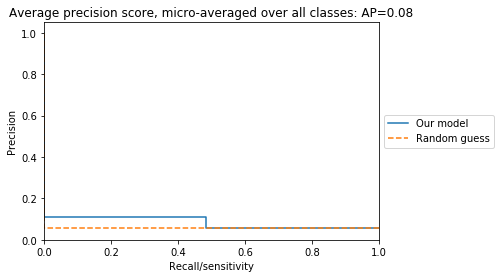

In [497]:
calc_precision_recall(y_test, y_scores, y_pred_ = pred)